In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv(r"C:\Users\sandi\Downloads\diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

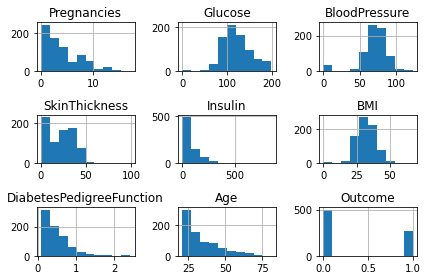

In [6]:
df.hist()
plt.tight_layout()

In [7]:
df.iloc[:,1:6]=df.iloc[:,1:6].replace(0,np.nan)

In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
 # impute the values by simple imputer 
from sklearn.impute import SimpleImputer

In [11]:
sc = SimpleImputer(strategy="median")

In [12]:
df.iloc[:,1:6] = sc.fit_transform(df.iloc[:,1:6])

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
x = ss.fit_transform(x)


x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

# Model Building

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [24]:
confusion_matrix(ytest,ypred)

array([[86, 13],
       [18, 37]], dtype=int64)

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [26]:
accuracy_score(ytest,ypred)

0.7987012987012987

In [27]:
# for training and testing accuracy the .score function
print("Trainnig accuracy is ")
print(knn.score(xtrain,ytrain))

print("Testing accuracy is ")
print(knn.score(xtest,ytest))

Trainnig accuracy is 
0.8192182410423453
Testing accuracy is 
0.7987012987012987


# Selecting best value for k

In [28]:
trainac = [] 
testac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

Text(0, 0.5, 'Accuracy')

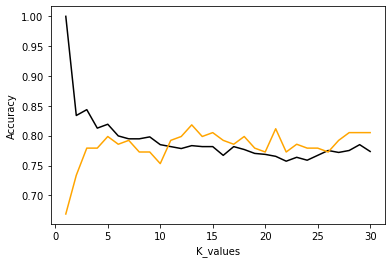

In [29]:
# ploted line chart for the accuracy 
plt.plot(range(1,31),trainac,color= "black")
plt.plot(range(1,31),testac,color= "Orange")
plt.xlabel("K_values")
plt.ylabel("Accuracy")

In [30]:
# Final model 

In [31]:
knn = KNeighborsClassifier(n_neighbors=26)
    
knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

print(knn.score(xtrain,ytrain))
print(knn.score(xtest,ytest))

0.7752442996742671
0.7727272727272727
